### Visualization with Seaborn

• Matplotlib has proven to be an incredibly useful and popular visualization tool, but even avid users will admit it often leaves much to be desired. There are several valid complaints about Matplotlib that often come up:

• Prior to version 2.0, Matplotlib’s defaults are not exactly the best choices. It was based off of MATLAB circa 1999, and this often shows.

• Matplotlib’s API is relatively low level. Doing sophisticated statistical visualization is possible, but often requires a lot of boilerplate code.

• Matplotlib predated Pandas by more than a decade, and thus is not designed for use with Pandas DataFrame s. In order to visualize data from a Pandas DataFrame , you must extract each Series and often concatenate them together into the right format. It would be nicer to have a plotting library that can intelligently use the DataFrame labels in a plot.

• An answer to these problems is Seaborn. Seaborn provides an API on top of Matplotlib that offers sane choices for plot style and color defaults, defines simple high-level functions for common statistical plot types, and integrates with the functionality provided by Pandas DataFrames.

• To be fair, the Matplotlib team is addressing this: it has recently added the plt.style tools, and is starting to handle Pandas data more seamlessly. The 2.0 release of the library will include a new default stylesheet that will improve on the current status quo. But for all the reasons just discussed, Seaborn remains an extremely useful add-on.

### Seaborn Versus Matplotlib

• Here is an example of a simple random-walk plot in Matplotlib, using its classic plot formatting and colors.

• We start with the typical imports:

In [2]:
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import numpy as np
import pandas as pd

• Now we create some random walk data:

In [3]:
rng = np.random.RandomState(0)
x = np.linspace(0, 10, 500)
y = np.cumsum(rng.randn(500, 6), 0)

• And do a simple plot

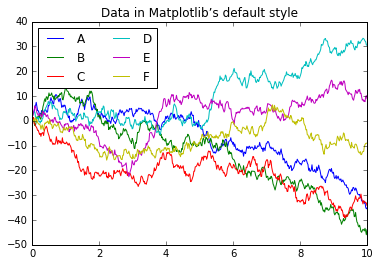

In [5]:
# plot the data with Matplotlib defaults
plt.plot(x, y)
plt.legend('ABCDEF', ncol = 2, loc = 'upper left')
plt.title('Data in Matplotlib’s default style');

• Although the result contains all the information we’d like it to convey, it does so in a way that is not all that aesthetically pleasing, and even looks a bit old-fashioned in the context of 21st-century data visualization.

• Now let’s take a look at how it works with Seaborn.

• As we will see, Seaborn has many of its own high-level plotting routines, but it can also overwrite Matplotlib’s default parameters and in turn get even simple Matplotlib scripts to produce vastly superior output.

• We can set the style by calling Seaborn’s set() method.

• By convention, Seaborn is imported as sns :

In [7]:
import seaborn as sns
sns.set()

• Now let’s rerun the same two lines as before

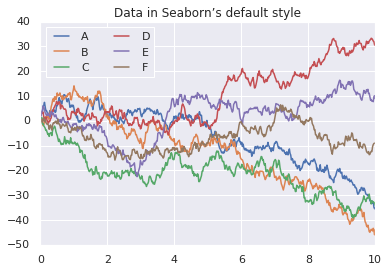

In [10]:
# Same plotting code as above
plt.plot(x, y)
plt.legend('ABCDEF', ncol = 2, loc = 'upper left')
plt.title('Data in Seaborn’s default style');

### Exploring Seaborn Plots

• The main idea of Seaborn is that it provides high-level commands to create a variety of plot types useful for statistical data exploration, and even some statistical model fitting.

• Let’s take a look at a few of the datasets and plot types available in Seaborn.

• Note that all of the following could be done using raw Matplotlib commands (this is, in fact, what Seaborn does under the hood), but the Seaborn API is much more convenient.

### Histograms, KDE, and densities

• Often in statistical data visualization, all you want is to plot histograms and joint distributions of variables.

• We have seen that this is relatively straightforward in Matplotlib.

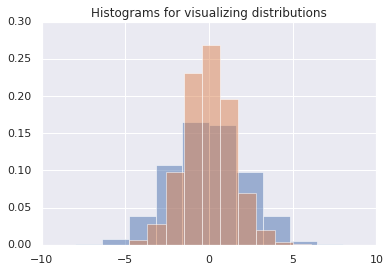

In [18]:
data = np.random.multivariate_normal([0, 0], [[5, 2], [2, 2]], size = 2000)
data = pd.DataFrame(data, columns = ['x', 'y'])
for col in 'xy':
    plt.title('Histograms for visualizing distributions')
    plt.hist(data[col], density = True, alpha = 0.5)

• Rather than a histogram, we can get a smooth estimate of the distribution using a kernel density estimation, which Seaborn does with sns.kdeplot.

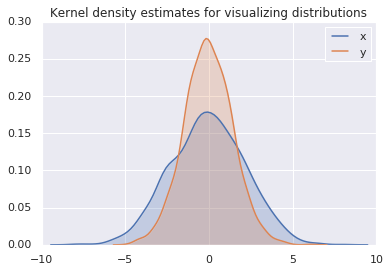

In [22]:
for col in 'xy':
    sns.kdeplot(data[col], shade = True)
    plt.title('Kernel density estimates for visualizing distributions')

• Histograms and KDE can be combined using distplot

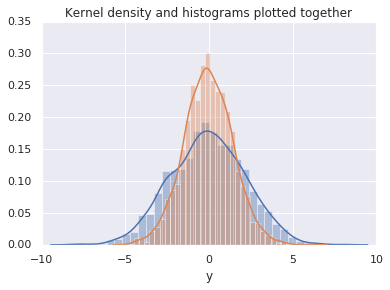

In [25]:
sns.distplot(data['x'])
sns.distplot(data['y'])
plt.title('Kernel density and histograms plotted together');

• If we pass the full two-dimensional dataset to kdeplot , we will get a two-dimensional visualization of the data.

/home/rajesh/my_project/lib/python3.6/site-packages/seaborn/distributions.py:679: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


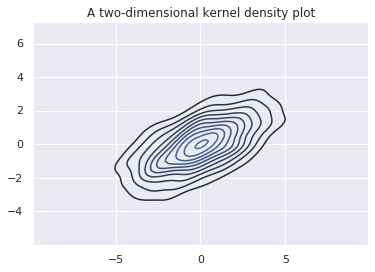

In [26]:
sns.kdeplot(data)
plt.title('A two-dimensional kernel density plot');

• We can see the joint distribution and the marginal distributions together using sns.jointplot.

• For this plot, we’ll set the style to a white background.

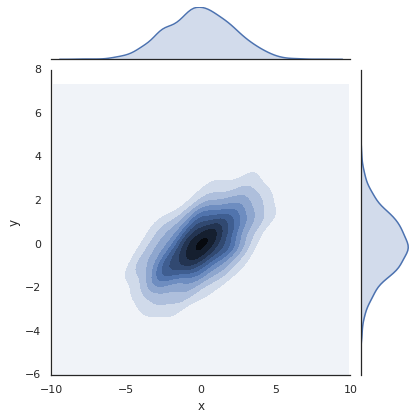

In [33]:
with sns.axes_style('white'):
        sns.jointplot('x', 'y', data, kind = 'kde');

• There are other parameters that can be passed to jointplot —for example, we can use a hexagonally based histogram instead.

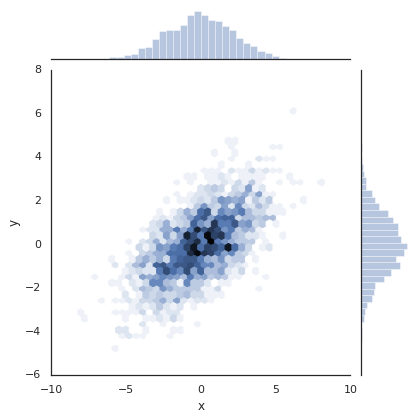

In [34]:
with sns.axes_style('white'):
    sns.jointplot('x', 'y', data, kind = 'hex');

### Pair plots

• When you generalize joint plots to datasets of larger dimensions, you end up with pair plots.

• This is very useful for exploring correlations between multidimensional data, when you’d like to plot all pairs of values against each other.

• We’ll demo this with the well-known Iris dataset, which lists measurements of petals and sepals of three iris species:

In [37]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


• Visualizing the multidimensional relationships among the samples is as easy as calling sns.pairplot

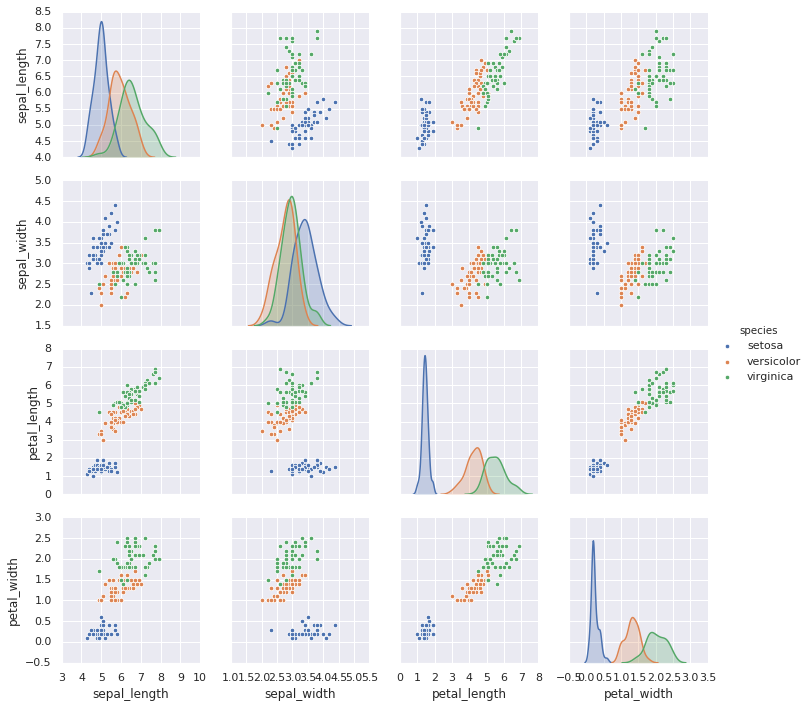

In [46]:
sns.pairplot(iris, hue = 'species', height = 2.5);

### Faceted histograms

• Sometimes the best way to view data is via histograms of subsets.

• Seaborn’s FacetGrid makes this extremely simple.

• We’ll take a look at some data that shows the amount that restaurant staff receive in tips based on various indicator data.

In [47]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


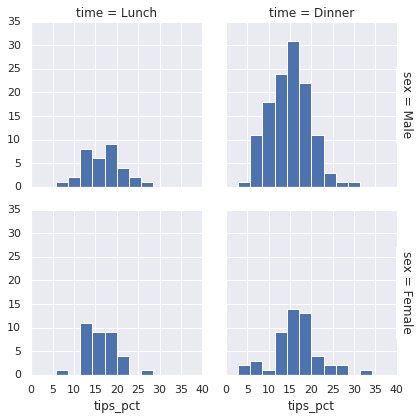

In [53]:
tips['tips_pct'] = 100 * tips['tip'] / tips['total_bill']

grid = sns.FacetGrid(tips, row = 'sex', col = 'time', margin_titles = True)
grid.map(plt.hist, 'tips_pct', bins = np.linspace(0, 40, 15));

### Factor plots

• Factor plots can be useful for this kind of visualization as well.

• This allows you to view the distribution of a parameter within bins defined by any other parameter.

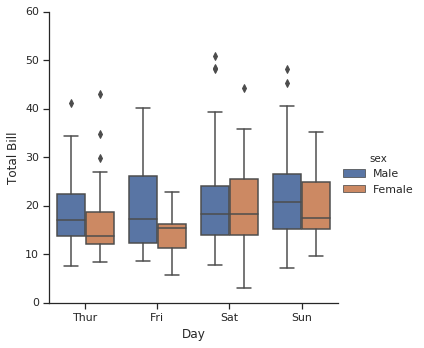

In [55]:
with sns.axes_style(style='ticks'):
    g = sns.factorplot('day', 'total_bill', 'sex', data = tips, kind = 'box')
    g.set_axis_labels('Day', 'Total Bill')